<h1 style="color:darkblue">K-Means</h1>

### Introducción.
Existen ocasiones en las que se desea segmentar a un grupo de datos, como cuando se desea analizar a un mercado objetivo en mercadotecnia, identificar datos especificos en un documentos, buscar patrones en imagenes, identificar tendencias en datos dinamicos, etc. Es para esto y más que se utiliza K-Means, uno de los algoritmos de machine learning más sencillos.

De forma intutitiva, el algoritmo K-means busca a un conjunto de datos en $k$ grupos separados, forma conjuntos de datos con centroides de tal forma que la distancia del centro a los datos sea la mínima.

### Algoritmo.
1. Sea $X$ un conjunto de $n$ datos con dimensión $m$.

2. Se construye $C$ como un conjunto de números, con una distribución aleatoria, que representa el total de agrupaciones (clusters) en los que se piensa dividir el conjunto de datos $X$. <br>
> A cada elemento $c \in C$ se le denomina centroide y es el representante de cada cluster. 
> <h4> $C=\{ \mu | \mu \in \mathbb{R}^m \}; \space donde \space C = k$ </h4>

3. Se construyen $k$ listas vacías donde se almacenan los datos representantes de los $k$ centroides:
>$S_1, S_2, ..., S_k $ tal que $ S_i = []$

4. Para cada dato $x_j \in X$ se mide la distancia al centroide $\mu_i$ y se selecciona $c$ que posea la distancia mínima. Después se guardan los datos asignados a cada centroide.

5. Ahora, para cada conjunto $S_i$ se vuelven a calcular sus centroides, promediando los datos almacenados en ese mismo centroide $S_i$:
>  $ \mu_i = \frac{1}{|S_i|} \sum_{x_j \in S_i} x_j $
6. Se repite el paso 4 hasta que los centroides no cambien, que es cuando se encuentra la solución estable.
7. Se muestran los centroides resultantes

### Supuestos
- Las agrupaciones (clusters) tienen forma esferica.
- La varianza de las variables es la misma.
- El numero de elementos de cada cluster es aproximadamente el mismo.

In [1]:
#Librerias
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn import datasets

## Ejemplo

Datos: La información para este ejemplo es un dataset genérico de la flor "Iris (2015)" que contiene 150 datos sobre tres variedades de esta planta: setosa, versicolor y virginica.

In [2]:
iris = sns.load_dataset("iris")

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


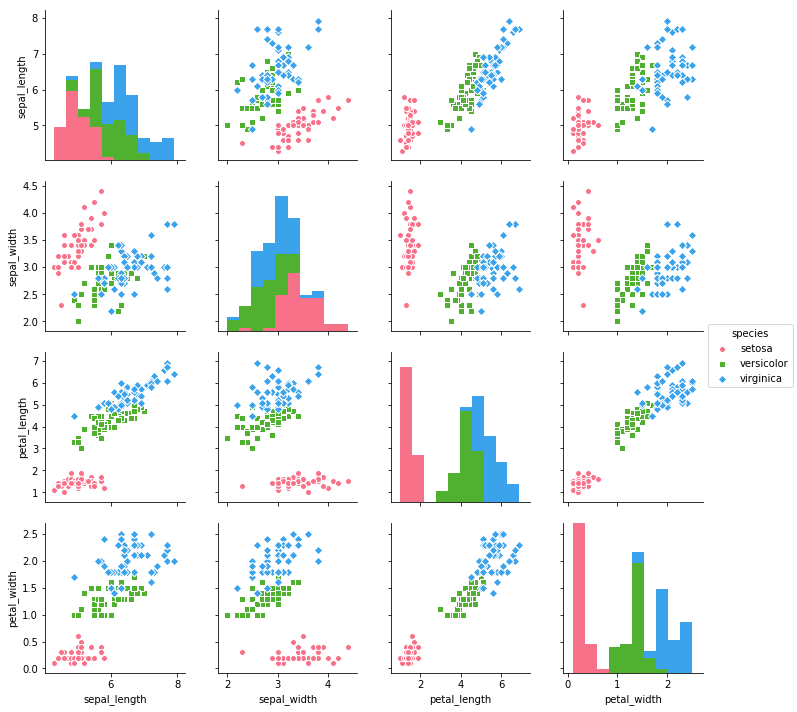

In [4]:
sns.pairplot(iris, hue="species", palette="husl", markers=["o", "s", "D"])

In [5]:
"""
Remplazo de datos para species
setosa: 0
versicolor: 1
virginica: 2
"""

iris["species"].replace(["setosa", "versicolor", "virginica"], [0,1,2], inplace=True)

In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
#Existen 4 parametros con los cuales se puede evaluara los tres tipos de especie
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
Y = iris["species"]

In [14]:
#Kmeans para disitos valores de k
km2 = KMeans(n_clusters=2, random_state=0, max_iter=1000).fit(X)
km3 = KMeans(n_clusters=3, random_state=0, max_iter=1000).fit(X)
km8 = KMeans(n_clusters=8, random_state=0,max_iter=1000).fit(X)

Text(0.5,0,'Largo Pétalo cm')

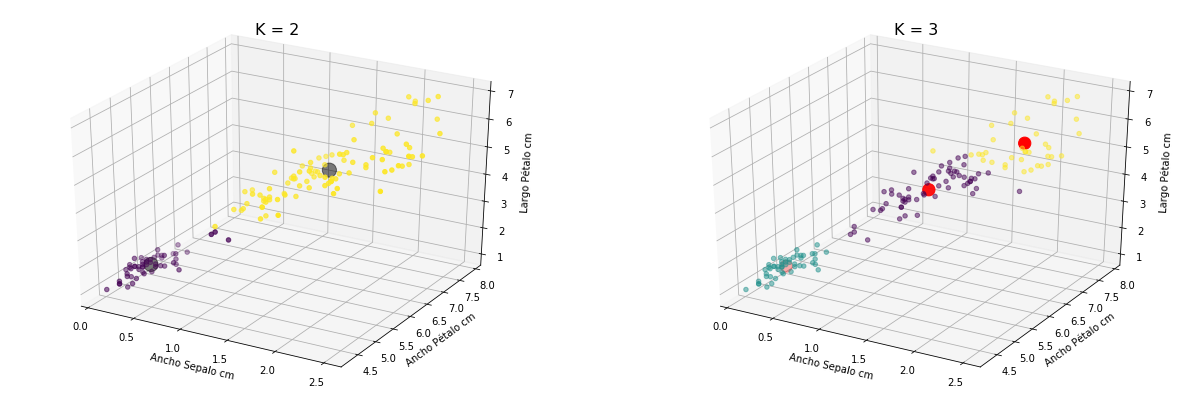

In [17]:
#Gráficas
fig = plt.figure(figsize=(21,7))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter( X["petal_width"], X["sepal_length"], X["petal_length"], c=km2.labels_)
centers2 = km2.cluster_centers_
ax1.scatter(centers2[:, 3], centers2[:, 0], centers2[:, 2], c = 'black', s = 200, alpha=0.5)
ax1.set_title("K = 2", fontsize=16)
ax1.set_xlabel("Ancho Sepalo cm")
ax1.set_ylabel("Ancho Pétalo cm")
ax1.set_zlabel("Largo Pétalo cm")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter( X["petal_width"], X["sepal_length"], X["petal_length"], c=km3.labels_, alpha=0.5)
centers3 = km3.cluster_centers_
ax2.scatter(centers3[:, 3], centers3[:, 0], centers3[:, 2], c = 'red', s = 150)
ax2.set_title("K = 3", fontsize=16)
ax2.set_xlabel("Ancho Sepalo cm")
ax2.set_ylabel("Ancho Pétalo cm")
ax2.set_zlabel("Largo Pétalo cm")

In [18]:
#suma de las distancias al cuadrado de los distintos modelos
print("k=2", km2.inertia_)
print("k=3", km3.inertia_)
print("k=8", km8.inertia_)

k=2 152.34795176035792
k=3 78.85144142614601
k=8 30.063110617452725


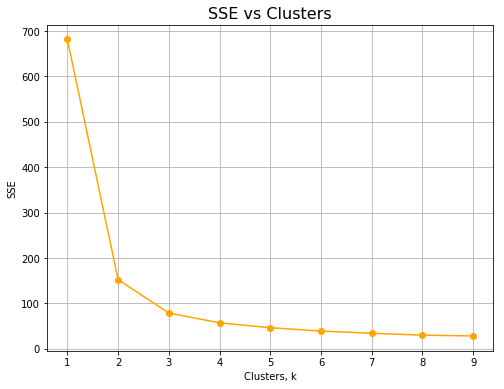

In [19]:
#Busqueda de k optimo

sse = []
lista = list(range(1,10))

for k in lista:
    km = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(lista, sse, '-o', color="orange")
plt.title("SSE vs Clusters", fontsize=16)
plt.grid()
plt.xlabel("Clusters, k")
plt.ylabel('SSE')
plt.show()

> Como se puede observar k=3 está en el "codo" de la curva. Se sabe que 3 es el valor ideal de k ya que existen tres variadades de Iris

In [20]:
#Evaluación del modelo
from sklearn.metrics import accuracy_score, silhouette_score, classification_report
print("Exactitud:", accuracy_score(Y, km3.labels_))
print("Silhouette:", silhouette_score(X, km3.labels_))

Exactitud: 0.24
Silhouette: 0.5528190123564101


In [21]:
print(classification_report(Y, km3.labels_ ))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.95      0.72      0.82        50

avg / total       0.32      0.24      0.27       150



> Como se puede observar, el modelo hasta ahora no es muy bueno, pero se puede mejorar si unicamente se toman en consideración las variables "sepal_length" & "sepal_width"

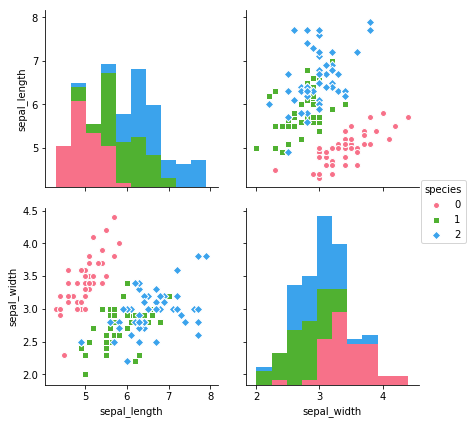

In [22]:
X1 = iris[["sepal_length","sepal_width"]]

sns.pairplot(vars=["sepal_length", "sepal_width"], 
             data = iris, hue = "species", size=3, 
             palette="husl", markers=["o", "s", "D"])

In [23]:
#K means para los 3 tipos de flor
kmean3 = KMeans(n_clusters=3, random_state=30 ,init="k-means++", max_iter=1000, n_init=50).fit(X1)

In [24]:
centers = kmean3.cluster_centers_

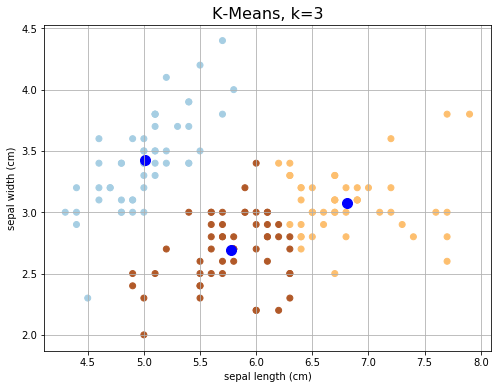

In [25]:
#Gráfica
plt.figure(figsize=(8,6))
plt.scatter(iris["sepal_length"], iris["sepal_width"] , c=kmean3.labels_, cmap = 'Paired')
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 100)
plt.title("K-Means, k=3", fontsize = 16)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.grid()
plt.show()

In [26]:
#Evaluación del modelo

print("Score:", kmean3.score(X1))
print("Exactitud:", accuracy_score(Y, kmean3.labels_))
print("Silhouette:", silhouette_score(X1, kmean3.labels_))

Score: -37.05070212765989
Exactitud: 0.5133333333333333
Silhouette: 0.4450525692083638


In [27]:
print(classification_report(Y, kmean3.labels_))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.26      0.24      0.25        50
          2       0.28      0.30      0.29        50

avg / total       0.51      0.51      0.51       150



>Con este último modelo se pudieron clasificar el 51% de los datos. 
>
>El modelo K-means un un clasificador muy fácil de entender y de implementar, pero si la naturaleza de los datos (como en este caso) no sigue una forma geométrica clara, será muy complicado de hacer predicciones con el algoritmo.
>
> Es importante notar que la variedad setosa, puede ser clasificada muy facilmente con este algoritmo ya que posee cualidades muy disitintas a las otras dos flores.

###### Ahora se desea identificar solamente a la variedad setosa de los datos

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
"""
Remplazo de datos para species
setosa: 0
no setosa: 1
"""
iris = sns.load_dataset("iris")
iris["species"].replace(["setosa", "versicolor", "virginica"], [0,1,1], inplace=True)

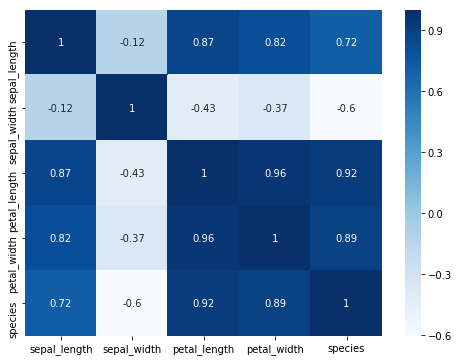

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(iris.corr(), annot=True, cmap="Blues")

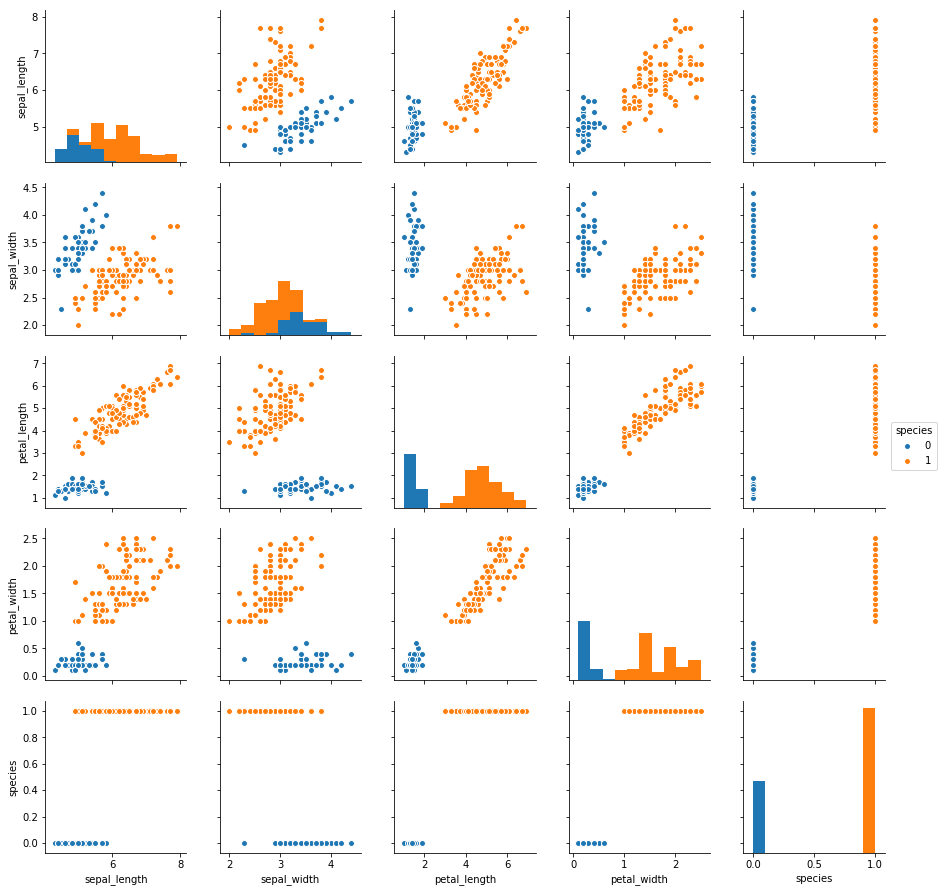

In [40]:
sns.pairplot(iris, hue="species")

> como en practicamente todos los gráficos la variedad setosa esta separada, se pueden considerar todas la variedades en el clasificador

In [42]:
X = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
Y = iris["species"]

kmodel = KMeans(n_clusters=2,init="k-means++", max_iter=1000, n_init=50).fit(X)
print(classification_report(Y, kmodel.labels_))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97        50
          1       1.00      0.97      0.98       100

avg / total       0.98      0.98      0.98       150



Text(0.5,0,'Largo Pétalo cm')

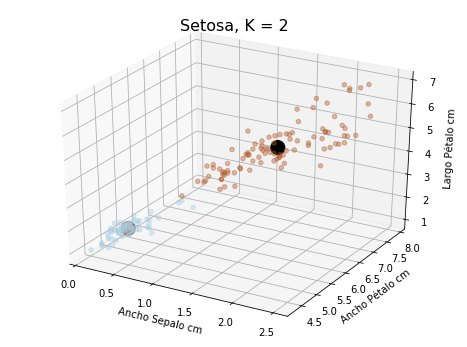

In [74]:
"""
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter( X["petal_width"], X["sepal_length"], X["petal_length"], c=km2.labels_)
centers2 = km2.cluster_centers_
ax1.scatter(centers2[:, 3], centers2[:, 0], centers2[:, 2], c = 'black', s = 200, alpha=0.5)
ax1.set_title("K = 2", fontsize=16)
ax1.set_xlabel("Ancho Sepalo cm")
ax1.set_ylabel("Ancho Pétalo cm")
ax1.set_zlabel("Largo Pétalo cm")
"""
centers = kmodel.cluster_centers_

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter( X["petal_width"], X["sepal_length"], X["petal_length"], c=km2.labels_, alpha=0.4, cmap="Paired")
ax.scatter(centers[:, 3], centers[:, 0], centers[:, 2], c = 'black', s = 200)
ax.set_title("Setosa, K = 2", fontsize=16)
ax.set_xlabel("Ancho Sepalo cm")
ax.set_ylabel("Ancho Pétalo cm")
ax.set_zlabel("Largo Pétalo cm")

> En conclusión: El modelo K-Means es muy fácil de implementar y de entender, pero es conveniente utilizarlo siempre que los clusters sean claros.
>
> En este último modelo, se pudo identificar con un 98% de exactitud si una flor era de la variedad setosa o no.

### Fuentes:
- tutorialspoint.com (2020) ML - Clustering K-Means Algorithm. Extraído el 28 de junio de 2020 de: https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_k_means.htm
- Duchesnay, Löfstedt & Younes (2019) K-means clustering (ch. 5). Statistics and Machine Learning in Python, Release 0.3 beta.
- Universidad Abierta y a Distancia de México (s.f.) K-Medios. Computación II: Unidad 2 Minería de Datos. Clave 05142423/06142423